# 在保险公司中应用决策树算法进行用户分类

## 读入数据

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./data/ma_resp_data_temp.csv', header = 0)

In [4]:
df.head()

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,281478,0,M,4,0,5,1,1,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,290485,0,M,0,0,0,0,0,N,N,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,299949,0,F,0,0,0,0,0,N,N,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,314635,0,F,0,4,0,0,0,N,N,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,363702,0,F,0,0,0,0,0,N,N,...,32,13,36.0,15,65.0,9.0,NaN,37,4,3


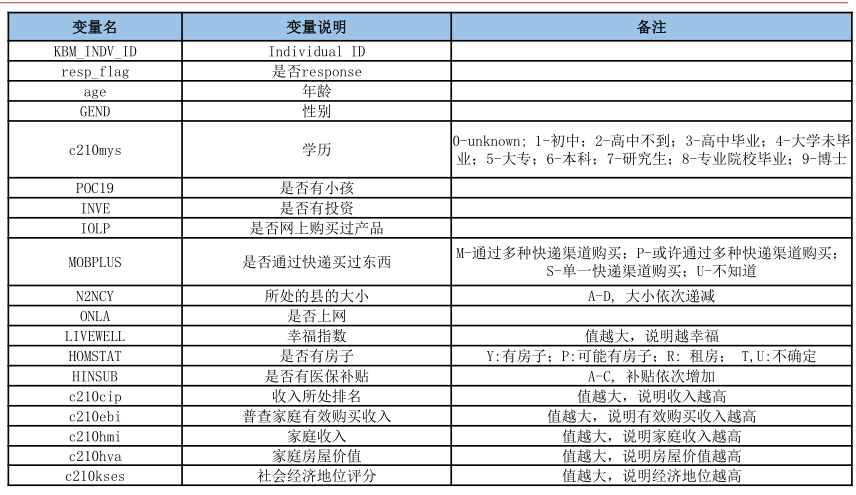

## 了解数据

In [7]:
# 记录最初的数据类型，并保存下来，方便后面进行对比


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43666 entries, 0 to 43665
Data columns (total 76 columns):
KBM_INDV_ID    43666 non-null int64
resp_flag      43666 non-null int64
GEND           43666 non-null object
CA00           43666 non-null int64
CA03           43666 non-null int64
CA06           43666 non-null int64
CA11           43666 non-null int64
CA16           43666 non-null int64
AART           43666 non-null object
ADBT           43666 non-null object
ADEP           43666 non-null object
AHBP           43666 non-null object
AHCH           43666 non-null object
ARES           43666 non-null object
AHRT           43666 non-null object
AASN           43656 non-null object
ADGS           43666 non-null object
AHRL           43666 non-null object
ASKN           43658 non-null object
AVIS           43666 non-null object
BANK           43666 non-null object
COLLEGE        43658 non-null object
FINI           43666 non-null object
INLI           43666 non-null object
INMEDI    

注： 第一列是用户ID，这一列作为数值存在时没有意义的，我们为了查看统计信息，把这一列改成字符型

In [8]:
#将 KBM_INDV_ID 的int64转化为object


把列名作为行，把统计值左右列应该会更方便一些

In [9]:
#df.describe().T

把这个统计值保存下来，方便后面查看

### 统计一下每一列中有多少个空值

统计有多少列中是有空值的

In [10]:
# 检查是否有缺失的列


统计各个列中空值的数量

将那些不为零的数据过滤出来

In [11]:
# 过滤出大于0的数据


In [12]:
# 把空值比例，换算成比例

In [13]:
# 发现保留位数太多，改变成保留小数点后两位

In [14]:
# 放到NA当中

**结论： 各个特征中空值所占百分比很低，没有需要因为空值太多而需要删除的列**

## 查看数据中是否有重复值

In [60]:
df[df.duplicated()]

,KBM_INDV_ID,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19


数据中没有完全相同的数据

## 可视化数据查看数据分布情况

In [21]:
# 引入画图模块
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
plt.style.use('seaborn')

In [23]:
# 支持中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 看一下目标变量是否平衡

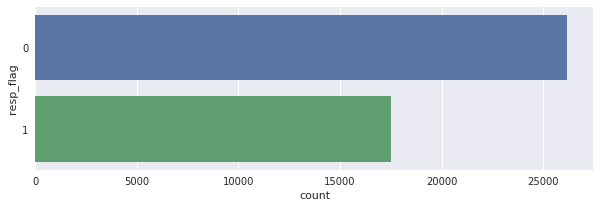

In [24]:
# 查看性别比例
plt.figure(1 , figsize = (10 , 3))
sns.countplot(y = 'resp_flag' , data = df)
plt.show()

**统计购买用户和未购买用户的比例关系**

In [85]:
df.resp_flag.sum() / df.resp_flag.shape[0]

0.4005175651536665

In [86]:
1 - df.resp_flag.sum() / df.resp_flag.shape[0]

0.5994824348463335

**购买保险用户相对较少一些,但相对比较平衡**

### 绘制年龄分布情况

**根据我们对于保险行业的经验, 年龄对于购买保险应该是一个非常重要的属性**

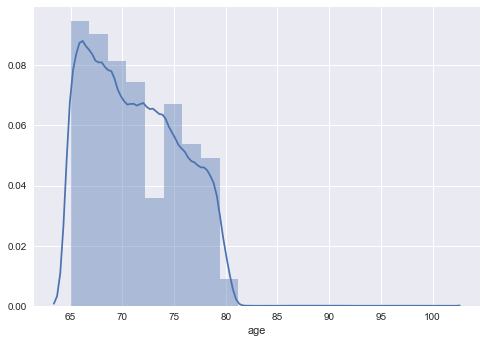

In [73]:
sns.distplot(df['age'],bins=20)

In [74]:
df['age'].max()

101.0

In [75]:
df['age'].min()

65.0

### 分别绘制两类样本的年龄分布

D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


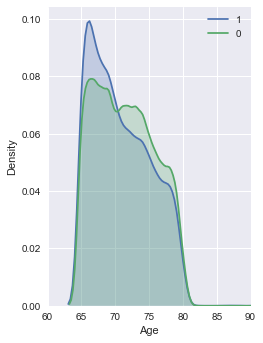

In [98]:
# 为连续型变量：年龄创建密度图 
plt.subplot(1, 2, 2)
sns.kdeplot(df.age[df.resp_flag==1], label='1', shade=True)
sns.kdeplot(df.age[df.resp_flag==0], label='0', shade=True)
plt.xlim(([60,90]))
plt.xlabel('Age');
plt.ylabel('Density');

### 查看性别比例

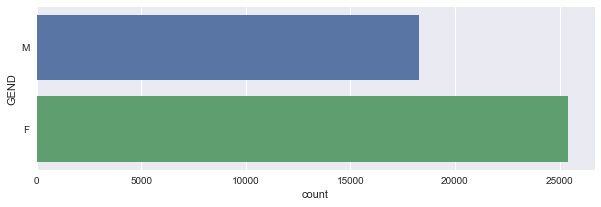

In [80]:
# 查看性别比例
plt.figure(1 , figsize = (10 , 3))
sns.countplot(y = 'GEND' , data = df)
plt.show()

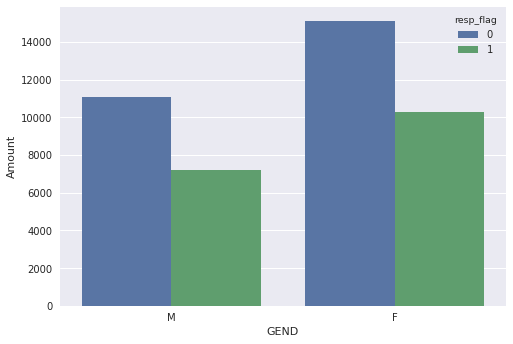

In [27]:
sns.countplot(x='GEND', hue='resp_flag', data=df); #设置 x,y 以及颜色控制的变量,以及画图的数据
plt.xlabel('GEND');
plt.ylabel('Amount');

### 学历情况

0-unknown; 1-初中；2-高中不到；3-高中毕业；4-大学未毕业；
5-大专；6-本科；7-研究生；8-专业院校毕业；9-博士

In [95]:
df.c210mys.value_counts()

4    18597
3    12437
6     7493
5     4474
2      462
7      130
0       60
1        9
8        4
Name: c210mys, dtype: int64

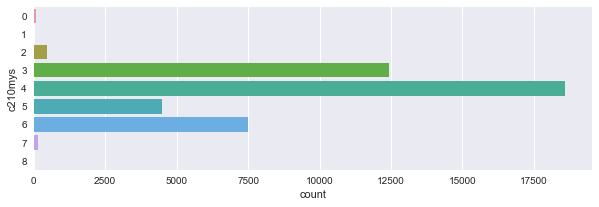

In [97]:
# 查看学历分布情况
plt.figure(1 , figsize = (10 , 3))
sns.countplot(y = 'c210mys' , data = df)
plt.show()

### 查看不同的学历之间购买保险比例

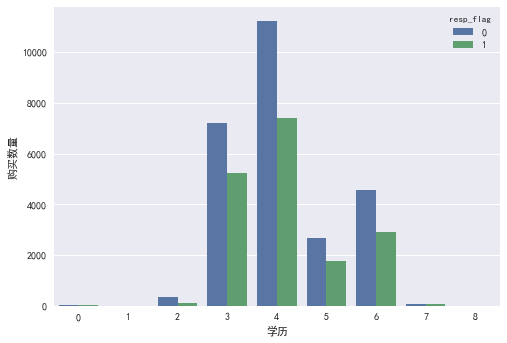

In [104]:
sns.countplot(x='c210mys', hue='resp_flag', data=df); #设置 x,y 以及颜色控制的变量,以及画图的数据
plt.xlabel('学历');
plt.ylabel('购买数量');

### 县级别和购买比例

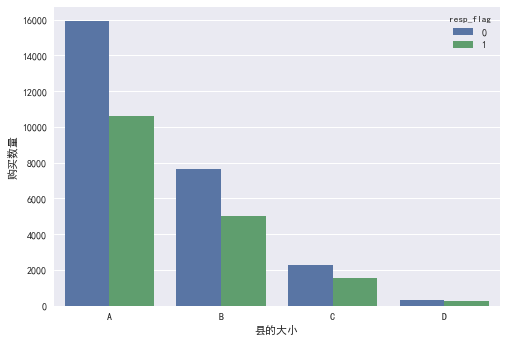

In [105]:
sns.countplot(x='N2NCY', hue='resp_flag', data=df); #设置 x,y 以及颜色控制的变量,以及画图的数据
plt.xlabel('县的大小');
plt.ylabel('购买数量');

## 空值填充

### 练习题: 请同学们把含有空值的列中, 每一列的数据类型统计出来

**答案**

In [19]:
NA

,Var,NA_count,空值比例
0,AASN,10,0.02
1,ASKN,8,0.02
2,COLLEGE,8,0.02
3,MOBPLUS,7,0.02
4,N2NCY,10,0.02
5,NY8Y9,9,0.02
6,POEP,8,0.02
7,LIVEWELL,5,0.01
8,HOMSTAT,10,0.02
9,HINSUB,11,0.03


In [20]:
# 首先统计一下这些特征中都属于什么数据类型
df.age.dtypes

dtype('float64')

In [21]:
# 写一个循环依次进行判断
temp = []
for feature in NA.Var:
    temp.append(df[feature].dtypes)

In [22]:
NA['数据类型'] = temp

In [23]:
NA

,Var,NA_count,空值比例,数据类型
0,AASN,10,0.02,object
1,ASKN,8,0.02,object
2,COLLEGE,8,0.02,object
3,MOBPLUS,7,0.02,object
4,N2NCY,10,0.02,object
5,NY8Y9,9,0.02,object
6,POEP,8,0.02,object
7,LIVEWELL,5,0.01,float64
8,HOMSTAT,10,0.02,object
9,HINSUB,11,0.03,object


### 空值填充策略:

分类变量: 对于数据中的分类变量, 我们统一采用众数进行填充, 通常哪个分类水平出现的次数多, 这个出现的概率就是最高的.

数值型变量: 有一些变量虽然看起来是数值,但是已经是经过分箱之后的结果, 所以其实也是分类变量.

例如幸福指数LIVEWELL, 收入所处排名c210cip等

为了方便,我们把这些空值数据中,由什么样的值构成添加成一列

In [28]:
#df.c210wht.value_counts()

决定, 除年龄之外的其他特征, 我们采取众数进行填充. 年龄采取均值进行填充

In [29]:
#首先将NA中的列名,去除掉年龄age这个
# NA[NA.Var != 'age']

填充一列的代码可以用这个

df.AASN.fillna(df.AASN.mode()[0],inplace= True ) 

In [30]:
#NA[NA.Var != 'age'].Var

In [31]:
# 对这些列名进行遍历, 依次进行填充


In [32]:
# 对年龄采用平均数填充


### 确认是否全部填充完全

## 变量编码

### 首先把用户ID列删除

In [29]:
del df['KBM_INDV_ID']

In [30]:
df.head(10)

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,M,4,0,5,1,1,N,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,0,M,0,0,0,0,0,N,N,N,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,0,F,0,0,0,0,0,N,N,N,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,0,F,0,4,0,0,0,N,N,N,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,0,F,0,0,0,0,0,N,N,N,...,32,13,36.0,15,65.0,9.0,61.0,37,4,3
5,0,F,0,0,0,0,0,Y,N,N,...,37,50,80.0,32,53.0,17.0,61.0,46,14,2
6,0,F,0,0,0,0,0,N,N,N,...,61,92,99.0,35,75.0,21.0,61.0,46,12,7
7,0,M,0,0,0,0,0,N,N,N,...,45,46,99.0,19,83.0,8.0,61.0,46,4,9
8,0,M,4,1,3,0,0,N,N,N,...,30,61,99.0,25,71.0,41.0,61.0,46,9,6
9,0,F,0,0,0,0,0,N,N,N,...,19,18,99.0,4,76.0,12.0,61.0,46,2,1


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43666 entries, 0 to 43665
Data columns (total 75 columns):
resp_flag     43666 non-null int64
GEND          43666 non-null object
CA00          43666 non-null int64
CA03          43666 non-null int64
CA06          43666 non-null int64
CA11          43666 non-null int64
CA16          43666 non-null int64
AART          43666 non-null object
ADBT          43666 non-null object
ADEP          43666 non-null object
AHBP          43666 non-null object
AHCH          43666 non-null object
ARES          43666 non-null object
AHRT          43666 non-null object
AASN          43666 non-null object
ADGS          43666 non-null object
AHRL          43666 non-null object
ASKN          43666 non-null object
AVIS          43666 non-null object
BANK          43666 non-null object
COLLEGE       43666 non-null object
FINI          43666 non-null object
INLI          43666 non-null object
INMEDI        43666 non-null object
INVE          43666 non-null obje

In [215]:
# 我们依然采用pandas进行数据编码
df.MOBPLUS.value_counts()

M    27457
S     9947
U     3912
P     2350
Name: MOBPLUS, dtype: int64

**我们编写一个功能,可以将字符串映射为数字**

In [155]:
df.head(10)

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,M,4,0,5,1,1,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,A,N,N,Y,N,N,Y,Y,Y,Y,N,N,N,N,N,N,1.0,5,3,8,Y,Y,C,CA,67.000000,99,11.0,10,1,74.0,71,90.0,738.0,111,64.0,0,5,14,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,0,M,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,P,A,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,4.0,0,1,1,U,Y,U,CA,76.000000,98,6.0,15,2,69.0,69,84.0,494.0,97,56.0,0,4,15,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,M,A,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,3.0,0,1,1,U,Y,U,CA,67.000000,88,4.0,26,12,32.0,44,50.0,516.0,83,50.0,0,4,17,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,0,F,0,4,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,S,B,N,N,N,Y,Y,N,Y,Y,Y,N,N,N,N,N,N,1.0,1,4,5,Y,Y,C,CA,71.000000,96,4.0,15,4,82.0,82,103.0,473.0,105,52.0,0,4,14,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,M,B,N,N,N,N,N,N,Y,Y,N,Y,Y,N,Y,Y,N,3.0,0,1,1,U,U,A,CA,75.000000,88,4.0,9,12,38.0,47,55.0,523.0,89,50.0,10,4,29,32,13,36.0,15,65.0,9.0,61.0,37,4,3
5,0,F,0,0,0,0,0,Y,N,N,N,Y,Y,N,Y,Y,N,N,Y,N,N,N,Y,Y,Y,Y,M,A,N,N,N,N,N,N,Y,Y,N,N,Y,Y,N,Y,N,4.0,0,2,2,U,Y,B,CA,74.000000,61,4.0,24,39,4.0,26,28.0,999.0,65,58.0,19,3,17,37,50,80.0,32,53.0,17.0,61.0,46,14,2
6,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,M,A,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,1.0,0,3,3,P,Y,U,CA,71.225551,98,4.0,12,2,89.0,91,118.0,999.0,119,57.0,0,6,6,61,92,99.0,35,75.0,21.0,61.0,46,12,7
7,0,M,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,U,A,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,4.0,0,1,1,U,U,U,CA,71.225551,95,7.0,4,5,79.0,70,85.0,999.0,124,55.0,0,6,15,45,46,99.0,19,83.0,8.0,61.0,46,4,9
8,0,M,4,1,3,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,M,A,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,2.0,4,3,7,Y,Y,C,CA,71.225551,92,3.0,11,8,79.0,61,72.0,999.0,104,55.0,0,5,21,30,61,99.0,25,71.0,41.0,61.0,46,9,6
9,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,A,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,4.0,0,0,0,U,U,U,CA,71.225551,98,1.0,7,2,55.0,58,69.0,999.0,109,55.0,0,6,13,19,18,99.0,4,76.0,12.0,61.0,46,2,1


In [216]:
# 我们写一个功能,可以自动对分类变量进行编码
# 我们以AART为例
df.AART.unique() # 这样我们就可以获取到这一列中的几个不同的值

array(['N', 'Y'], dtype=object)

In [33]:
#  我们构造出一个字典, 字典的key 为原来的值, 字典的value 为编码后的值


In [43]:
df.head(10)

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,M,4,0,5,1,1,N,N,N,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,0,M,0,0,0,0,0,N,N,N,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,0,F,0,0,0,0,0,N,N,N,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,0,F,0,4,0,0,0,N,N,N,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,0,F,0,0,0,0,0,N,N,N,...,32,13,36.0,15,65.0,9.0,61.0,37,4,3
5,0,F,0,0,0,0,0,Y,N,N,...,37,50,80.0,32,53.0,17.0,61.0,46,14,2
6,0,F,0,0,0,0,0,N,N,N,...,61,92,99.0,35,75.0,21.0,61.0,46,12,7
7,0,M,0,0,0,0,0,N,N,N,...,45,46,99.0,19,83.0,8.0,61.0,46,4,9
8,0,M,4,1,3,0,0,N,N,N,...,30,61,99.0,25,71.0,41.0,61.0,46,9,6
9,0,F,0,0,0,0,0,N,N,N,...,19,18,99.0,4,76.0,12.0,61.0,46,2,1


In [174]:
# df_object = df.select_dtypes('object')

In [34]:
# 将所有的object列做编码的操作

用判断的方法选择object数据类型的列, 然后对这些列进行转换

In [31]:
df_copy = df.copy()

In [220]:
#  误操作还原数据
# df = df_copy.copy()

进行数据的编码转换

**如此一来我们就编码成功了**

In [35]:
# df.head(10)

注: 还可以采用哑变量对数据进行编码, 这里我们仅仅是采用分类变量编码的方式对数据进行了替换.

我们先用这种方式建模, 观察结果, 然后再使用哑变量转换数据, 对两种方式的效果进行对比.

## 进行机器学习建模

### 切分数据集

将数据集切分成训练数据和测试数据

In [33]:
from sklearn import tree
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report
#from sklearn import cross_validation, metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

In [47]:
df.head()

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,...,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,0,4,0,5,1,1,0,0,0,...,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,0,0,0,0,0,0,0,0,0,0,...,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,0,1,0,0,0,0,0,0,0,0,...,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,0,1,0,4,0,0,0,0,0,0,...,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,0,1,0,0,0,0,0,0,0,0,...,32,13,36.0,15,65.0,9.0,61.0,37,4,3


In [36]:
# 取出x和y


In [49]:
# 将数据集7：3分，70%用来建模，30%用来测试
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=66)

### 用默认模型试一下

### 尝试调参

### 决策树中参数的含义解释如下

In [ ]:
clf = tree.DecisionTreeClassifier(
            class_weight=None, #指定样本各类别的的权重，如果样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的"None"
            criterion='gini',#特征选择标准,可以使用"gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。一般说使用默认的基尼系数"gini"就可以了，即CART算法。除非你更喜欢类似ID3, C4.5的最优特征选择方法。 
            max_depth=None,#决策树最大深,常用的可以取值10-100之间。主要是限制树的增长
            max_features=None,#划分时考虑的最大特征数
            max_leaf_nodes=None,#最大叶子节点数。通过限制最大叶。这个值限制了决策树的增长
            #min_samples_leaf=3000, #叶子节点最少样本数，用于减枝
            min_samples_split=5000,#内部节点再划分所需最小样本数，这个值限制了子树继续划分的条件
            min_weight_fraction_leaf=0.0, #叶子节点最小的样本权重和。这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。
            presort=False, #数据是否预排序
            splitter='best' #特征划分点选择标准,可以使用"best"或者"random"。前者在特征的所有划分点中找出最优的划分点。后者是随机的在部分划分点中找局部最优的划分点。
            )


### 我们尝试使用最小叶节点样本数量和最小分割样本数量进行调参

使用roc_auc分数进行调参分数判断

### 尝试使用最大深度和最小叶节点数量进行调参

### 模型评估

In [106]:
y_pred = gsearch.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [109]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred,labels=[1,0])
print('confusion matrix',cm)

accuracy: 0.6458778625954198
precision: 0.6283682634730539
confusion matrix [[1679 3646]
 [ 993 6782]]


In [111]:
recall_score(y_test, y_pred)

0.3153051643192488

### 输出规则

#### 安装graphviz

scikit-learn中决策树的可视化一般需要安装graphviz。主要包括graphviz的安装和anaconda的graphviz插件的安装。

第一步是安装graphviz。下载地址在：https://graphviz.gitlab.io/_pages/Download/Download_windows.html 。下载msi/zip文件安装，装完后都要设置环境变量，将graphviz的bin目录加到PATH，比如我是windows，将C:/Program Files (x86)/Graphviz2.38/bin/加入了PATH

第二步是安装anaconda插件pydotplus: pip install pydotplus

这样环境就搭好了，有时候anaconda/python 会很笨，仍然找不到graphviz，这时，可以在代码里面加入这一行：

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

注意后面的路径是你自己的graphviz的bin目录。

In [118]:
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf=1000)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.6399236641221374


In [65]:
features= list(df.columns[1:]) 

In [119]:
dot_data = tree.export_graphviz(clf
                    ,feature_names= features,
                    class_names=['No Purchase',"Purchase"],       #字符串列表形式，默认为空，指定目标类的名称
                     filled=True,                     #默认False，对节点着色以显示多数类
                     rounded=True,                    #默认为False，若为True，节点框为圆角且用赫维提卡体代替默认的罗马字体
                     #rotate=True,                    #默认为False，若为True，树将长成左右结构，而不是默认的上下结构
                     impurity=True,                   #默认为True，是否为每个节点输出不纯度
                     leaves_parallel=False,         #默认为False,是否在树的底部画出叶节点
                     node_ids=True
                               )

In [120]:
import graphviz # pip install graphviz 安装

In [121]:
import pydotplus #  pip install pydotplus  安装
from IPython.display import Image

In [122]:
graph = graphviz.Source(dot_data)

In [123]:
# 输出PDF文件
graph.render("wine")

'wine.pdf'

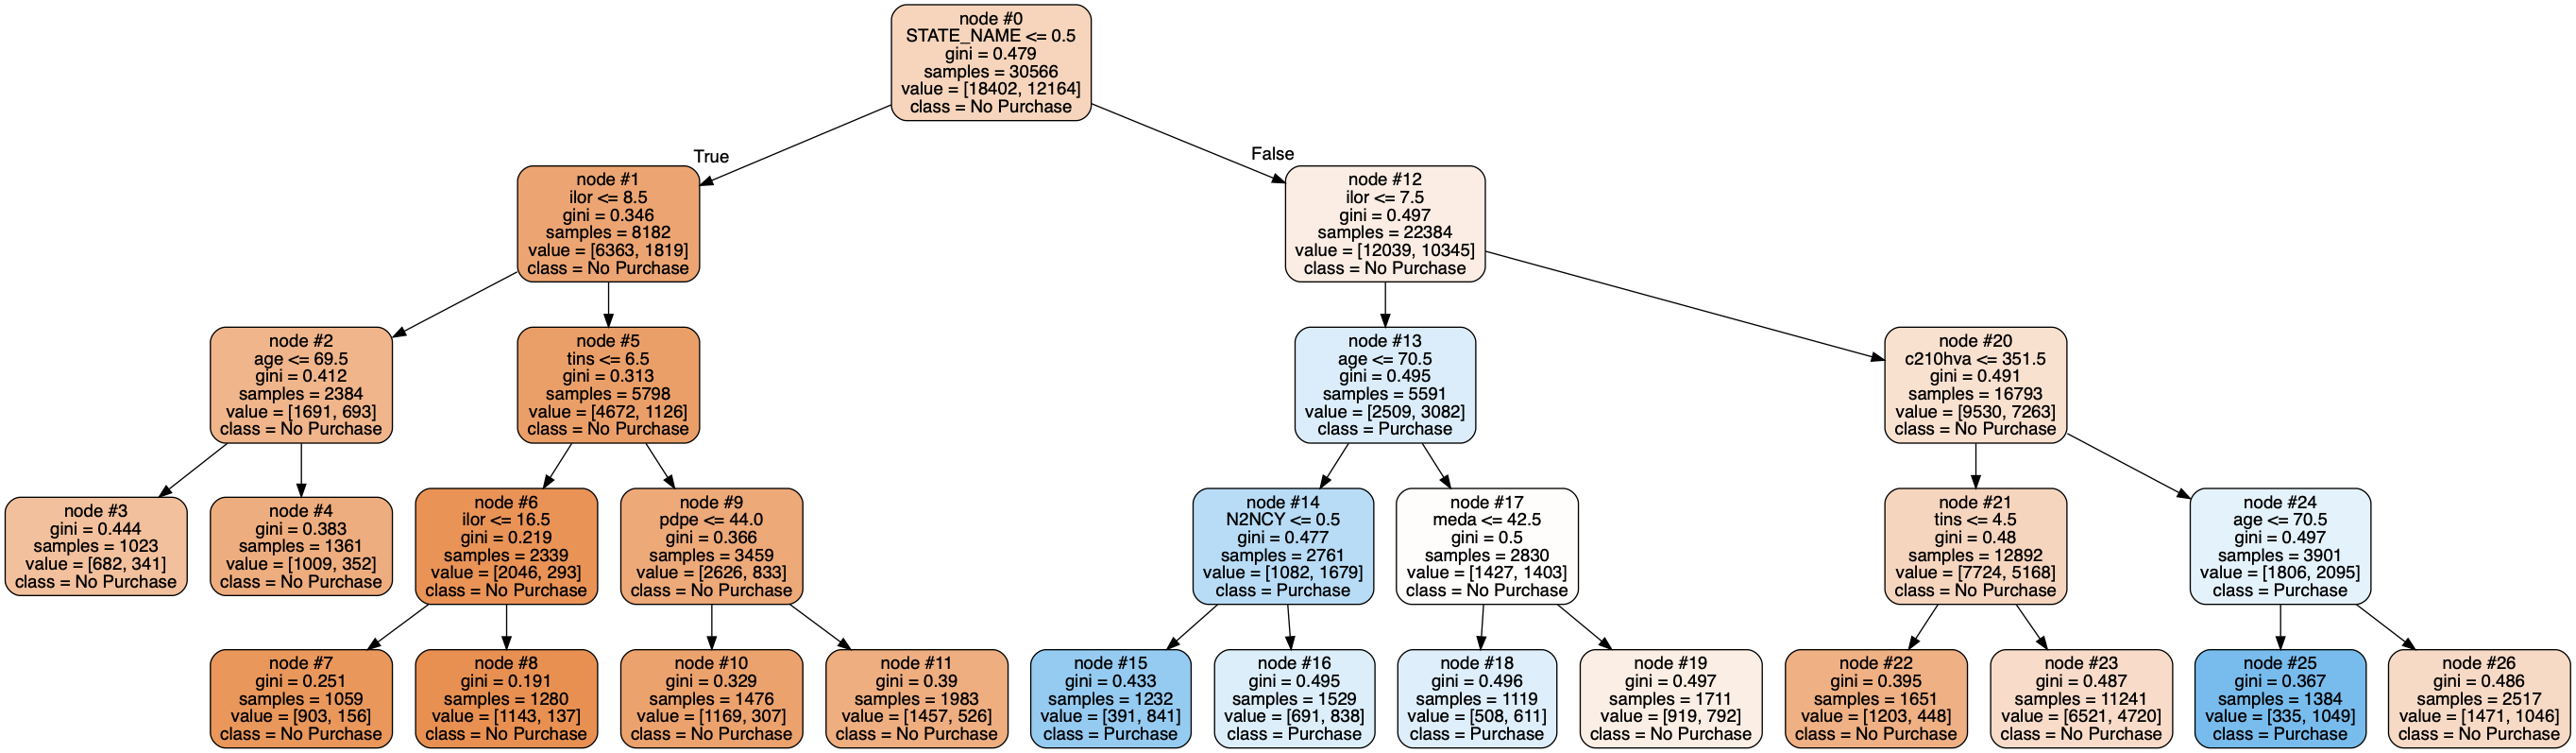

In [124]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### 使用随机森林尝试建模

In [248]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6315267175572519

In [250]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(rfc.score(X_train, y_train))
rfc.score(X_test, y_test)

1.0


0.6670992366412214

In [251]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(rfc.score(X_train, y_train))
rfc.score(X_test, y_test)

1.0


0.6680916030534351

In [253]:
rfc = RandomForestClassifier(n_estimators=200,max_depth = 15)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(rfc.score(X_train, y_train))
rfc.score(X_test, y_test)

0.8900739383628868


0.6654961832061068

In [260]:
rfc = RandomForestClassifier(n_estimators=500,max_depth = 12, class_weight="balanced",
                            criterion='entropy',)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(rfc.score(X_train, y_train))
rfc.score(X_test, y_test)

0.7884577635281032


0.6426717557251909

In [261]:
from sklearn.ensemble import AdaBoostClassifier

In [263]:
ada = AdaBoostClassifier(n_estimators=500,)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
print(ada.score(X_train, y_train))
ada.score(X_test, y_test)

0.6827193613819277


0.6561832061068702

## 将数据保存下来，进行独热编码后重新尝试建模

In [272]:
# df是已经编码完成的数据集
df.to_csv('../data/data_encoder.csv')

In [267]:
# df_copy 是编码之前的数据集， 我们也进行保存
df_copy.head()

,resp_flag,GEND,CA00,CA03,CA06,CA11,CA16,AART,ADBT,ADEP,AHBP,AHCH,ARES,AHRT,AASN,ADGS,AHRL,ASKN,AVIS,BANK,COLLEGE,FINI,INLI,INMEDI,INVE,IOLP,MOBPLUS,N2NCY,NY8Y9,N2N29,N3N39,N4N49,N5N59,N6N64,N65P,ONLA,POEP,SGFA,SGLL,SGOE,SGSE,SGTC,U18,LIVEWELL,NOC19,NAH19,NPH19,POC19,HOMSTAT,HINSUB,STATE_NAME,age,c210apvt,c210b200,c210blu,c210bpvt,c210cip,c210ebi,c210hmi,c210hva,c210kses,c210mah,c210mob,c210mys,c210pdv,c210pmr,c210poo,c210psu,c210pwc,c210wht,ilor,meda,pdpe,tins,zhip19
0,0,M,4,0,5,1,1,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,S,A,N,N,Y,N,N,Y,Y,Y,Y,N,N,N,N,N,N,1.0,5,3,8,Y,Y,C,CA,67.0,99,11.0,10,1,74.0,71,90.0,738.0,111,64.0,0,5,14,52,65,71.0,22,79.0,15.0,64.0,42,8,8
1,0,M,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,P,A,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,4.0,0,1,1,U,Y,U,CA,76.0,98,6.0,15,2,69.0,69,84.0,494.0,97,56.0,0,4,15,44,81,99.0,37,65.0,17.0,61.0,46,6,3
2,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,M,A,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,3.0,0,1,1,U,Y,U,CA,67.0,88,4.0,26,12,32.0,44,50.0,516.0,83,50.0,0,4,17,38,44,62.0,44,47.0,20.0,61.0,46,7,3
3,0,F,0,4,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,S,B,N,N,N,Y,Y,N,Y,Y,Y,N,N,N,N,N,N,1.0,1,4,5,Y,Y,C,CA,71.0,96,4.0,15,4,82.0,82,103.0,473.0,105,52.0,0,4,14,45,71,99.0,39,71.0,4.0,62.0,37,8,9
4,0,F,0,0,0,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,M,B,N,N,N,N,N,N,Y,Y,N,Y,Y,N,Y,Y,N,3.0,0,1,1,U,U,A,CA,75.0,88,4.0,9,12,38.0,47,55.0,523.0,89,50.0,10,4,29,32,13,36.0,15,65.0,9.0,61.0,37,4,3


In [271]:
df_copy.to_csv('../data/data_no_encoder.csv')

In [270]:
pwd

'D:\\nextcloud\\Python课件\\pythoncode\\备课文件夹\\10.就业班三个案例研发\\01.商业保险案例对购买用户使用应用决策树模型进行分类\\code'